# Code

In [1]:
# Clone the entire repository
!git clone https://github.com/geekela/Chemoinformatics_project.git


Cloning into 'Chemoinformatics_project'...
remote: Enumerating objects: 471, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 471 (delta 0), reused 0 (delta 0), pack-reused 468 (from 1)
Receiving objects: 100% (471/471), 14.25 MiB | 12.56 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [2]:
# Change into the repository directory
%cd Chemoinformatics_project

/content/Chemoinformatics_project


## Import

In [3]:
import sys, os
sys.path.append(os.getcwd())

In [4]:
!pip install deepchem rdkit
!pip install xgboost
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.4/552.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 32.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


## Visualization

In [6]:
df=pd.read_csv('data/raw/bace.csv')

In [ ]:
df

In [ ]:
df.describe()

In [7]:
df_bace=df[['mol','pIC50']]

In [ ]:
df_bace

In [8]:
def canonicalize_smiles(smiles):
        '''This function takes a non-canonical SMILES and
        returns the canonical version
        Args:
            -smiles: str, non-canonical SMILES of a molecule
        Out:
            - canonical_smiles: str, canonical SMILES of the molecule
        '''

        mol = Chem.MolFromSmiles(smiles) # create a mol object from input smiles

        canonical_smiles = Chem.MolToSmiles(mol) # convert the previous mol object to SMILES using Chem.MolToSmiles()


        return canonical_smiles


    # apply canonical smiles to our df
df_bace['canonical_smiles'] = df_bace['mol'].apply(canonicalize_smiles)


/tmp/ipython-input-4287560437.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bace['canonical_smiles'] = df_bace['mol'].apply(canonicalize_smiles)


In [9]:
df_bace

,mol,pIC50,canonical_smiles
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3...
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872,CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F...
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970,CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2...
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,3.000000,CCC(CC(=O)NCC1CCOCC1)n1c(N)nc2cc(Cl)ccc21
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,3.000000,CCC(CC(=O)NCc1ccccn1)n1c(N)nc2cc(Cl)ccc21
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,2.953115,Cn1c(N)nc(C2CC2c2cccc(Br)c2)cc1=O
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,2.733298,Cn1c(N)nc(C2CC2c2cccc(-c3ccccc3)c2)cc1=O


<Axes: >

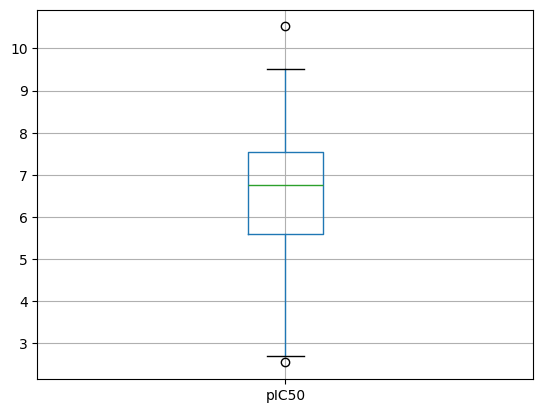

In [10]:
df_bace.boxplot(column='pIC50')

In [11]:
num_rows = len(df_bace)
num_unique_smiles = df_bace['canonical_smiles'].nunique()

print(f"\nTotal number of rows in the DataFrame: {num_rows}")
print(f"\nNumber of unique canonical SMILES: {num_unique_smiles}\n")

# drop old 'smiles' column
df_bace = df_bace.drop(columns='mol')


print(f"\n--- BACE Preprocessing Report ---\n")
print(f"Final dataset size: {df_bace.shape}\n")



Total number of rows in the DataFrame: 1513

Number of unique canonical SMILES: 1513


--- BACE Preprocessing Report ---

Final dataset size: (1513, 2)



In [ ]:

# Visualize some of the molecules of this dataset
n=6
df_sample=df_bace.sample(n)

smiles = df_sample['canonical_smiles'].values
legend = df_sample['pIC50'].values
molecs = [Chem.MolFromSmiles(s) for s in smiles]

Draw.MolsToGridImage(
    molecs,
    subImgSize=(600,300),
)

In [ ]:
total_na_values = df_bace.isna().sum().sum()
print(f"\nTOTAL number of Na in the DataFrame: {total_na_values}")
non_numeric_df = df_bace.select_dtypes(exclude=np.number)
print("\nNon-Numeric Columns (Categorical/Objects):")
print(non_numeric_df.columns.tolist())

In [ ]:
df_bace

## Featurization

In [ ]:
from Regression.src.featurizers import featurize_molecules
features = featurize_molecules(df=df_bace,
    methods=["rdkit", "ecfp","maccs"],smiles_col="canonical_smiles",
    target_col="pIC50",concatenate=False)

In [ ]:
features['rdkit'].columns

In [ ]:
concatenated_features= featurize_molecules(df=df_bace,
    methods=["rdkit", "ecfp","maccs"],concatenate=True)

In [ ]:
features['rdkit'].columns

## Baseline ML Models

In [ ]:
from Regression.src import baseline_regression_models
results_base_models, trained_base_models=baseline_regression_models.run_base_regressors(features)

In [ ]:
from Regression.src.baseline_regression_models import run_base_regressors, run_base_regressors_kv, run_gridsearch
from sklearn.model_selection import train_test_split
import pandas as pd

features_dict = features

for feat_name, df_feat in features_dict.items():

    X = df_feat.drop(columns=["canonical_smiles", "pIC50"], axis=1).values
    y = df_feat["pIC50"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results_df, trained_models = run_base_regressors(X_train, X_test, y_train, y_test, feat_name)

In [ ]:
from Regression.src.baseline_regression_models import run_base_regressors_kv

cv_results, best_models = run_base_regressors_kv(features_dict)

In [ ]:
from Regression.src.baseline_regression_models import run_gridsearch
grid_search_input_dict = {feat_name: df_feat}

grid_search_results, grid_models= run_gridsearch(
    grid_search_input_dict,
    X_train, X_test, y_train, y_test,
    verbose=True
)

## MLP on each featurization vs MLP with the 3 featurizations

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import pytorch_lightning as pl
from torch.utils.data import DataLoader, random_split, TensorDataset
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from Regression.src.MLP import MLP_BACE
from pytorch_lightning.loggers import CSVLogger
import matplotlib.pyplot as plt
import os

features_dict = features
mlp_results_rmse = {}

target_and_smiles = features_dict[list(features_dict.keys())[0]][["canonical_smiles", "pIC50"]].reset_index(drop=True)

feature_dfs = [df.drop(columns=["canonical_smiles", "pIC50"], errors='ignore').reset_index(drop=True)
               for df in features_dict.values()]

combined_features_only = pd.concat(feature_dfs, axis=1)

df_feat_combined = pd.concat([target_and_smiles, combined_features_only], axis=1)

all_features_to_run = features_dict.copy()
all_features_to_run['combined'] = df_feat_combined

for feat_name, df_feat in all_features_to_run.items():

    X = df_feat.drop(columns=["canonical_smiles", "pIC50"], axis=1).values
    y = df_feat["pIC50"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

    train_dataset_full = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_size = int(0.875 * len(train_dataset_full))
    val_size = len(train_dataset_full) - train_size

    train_subset, val_subset = random_split(
        train_dataset_full, [train_size, val_size],
        generator=torch.Generator().manual_seed(42)
    )

    batch_size = 32
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    input_dim = X_train.shape[1]
    mlp_model = MLP_BACE(
        input_dim=input_dim,
        out_dim=1)

    logger = CSVLogger('lightning_logs', name=f'mlp_run_{feat_name}')

    checkpoint_callback = ModelCheckpoint(
        monitor='val_loss',
        dirpath='mlp_checkpoints/',
        filename=f'best-mlp-{feat_name}-model',
        save_top_k=1,
        mode='min'
    )
    early_stop_callback = EarlyStopping(
        monitor='val_loss',
        patience=15,
        mode='min',
        verbose=False
    )

    trainer = pl.Trainer(
        max_epochs=100,
        callbacks=[checkpoint_callback, early_stop_callback],
        logger=logger,
        accelerator='auto',
        log_every_n_steps=10,
        enable_progress_bar=True
    )
    print(f"Training MLP model on {feat_name}...")
    trainer.fit(mlp_model, train_loader, val_loader)

    test_results = trainer.test(mlp_model, dataloaders=test_loader)

    current_rmse = test_results[0].get('test_rmse')
    mlp_results_rmse[feat_name] = current_rmse

    print(f"MLP Test RMSE for {feat_name}: {current_rmse:.4f}")

print("\n--- Summary of all MLP RMSE results ---")
print(mlp_results_rmse)

plot_results = {}
for feat_name in all_features_to_run.keys():
    log_dir = os.path.join('lightning_logs', f'mlp_run_{feat_name}')
    metrics_path_v0 = os.path.join(log_dir, 'version_0', 'metrics.csv')
    metrics_path_v1 = os.path.join(log_dir, 'version_1', 'metrics.csv')

    if os.path.exists(metrics_path_v0):
        metrics_df = pd.read_csv(metrics_path_v0)
    elif os.path.exists(metrics_path_v1):
        metrics_df = pd.read_csv(metrics_path_v1)
    else:
        continue

    val_loss = metrics_df['val_loss'].dropna().reset_index(drop=True)
    if not val_loss.empty:
        plot_results[feat_name] = val_loss

plt.figure(figsize=(10, 6))
for name, loss_values in plot_results.items():
    plt.plot(loss_values.index, loss_values.values, label=name.capitalize())

plt.title("Validation Loss Comparison (Separate vs. Combined Features)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss (MSE)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
markers = ['o', 's', '^', 'D']
line_styles = ['-', '--', ':', '-.']
color_map = {'rdkit': 'red', 'ecfp': 'green', 'maccs': 'blue', 'combined': 'black'}

# Filter RDKit out
filtered_plot_results = {k: v for k, v in plot_results.items() if k != 'rdkit'}

# Define smoothing window
SMOOTHING_WINDOW = 5

for i, (name, loss_values) in enumerate(filtered_plot_results.items()):

    # Apply rolling average for smoothing
    smoothed_loss = loss_values.rolling(window=SMOOTHING_WINDOW, min_periods=1).mean()

    plt.plot(
        smoothed_loss.index,
        smoothed_loss.values,
        label=name.capitalize(),
        color=color_map.get(name, 'gray'),
        linestyle=line_styles[i % 4],
        linewidth=2
    )

plt.title("Evolution of the test loss between the three MLP", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel(f"Test Loss", fontsize=14)

plt.ylim(0.4, 0.75)

plt.legend(title="Featurisation", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## GNN

In [15]:
!pip install torch-geometric ogb pytorch-lightning

In [16]:
from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader
import pytorch_lightning as pl
from Regression.src.bace_gnn import BACEGraphDataset, MPNN_BACE
import torch

In [18]:
# Create graph dataset from preprocessed data
bace_dataset = BACEGraphDataset(
      root='./bace_pyg',
      df=df_bace,
      smiles_col='canonical_smiles',
      target_col='pIC50'
  )

# Split the dataset
train_data, test_data = train_test_split(
      bace_dataset, train_size=0.8, random_state=42, shuffle=True
  )
train_data, val_data = train_test_split(
      train_data, train_size=0.9, random_state=42, shuffle=True
  )

# Calculate normalization statistics from training data
train_targets = [train_data[i].y.item() for i in range(len(train_data))]
mean_target = np.mean(train_targets)
std_target = np.std(train_targets)

print(f"Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")
print(f"Target normalization - Mean: {mean_target:.3f}, Std: {std_target:.3f}")

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, drop_last=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, drop_last=True)

# Initialize and Train the GNN Model
gnn_model = MPNN_BACE(hidden_dim=64, out_dim=1, std=std_target, lr=0.001)

# PyTorch Lightning Trainer
trainer = pl.Trainer(
      max_epochs=100,
      log_every_n_steps=10,
      accelerator='auto'
  )

print("\n--- Training GNN model... ---")
trainer.fit(model=gnn_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

# Evaluation on test set
print("\n--- Evaluating on test set... ---")
trainer.test(model=gnn_model, dataloaders=test_loader)

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type        | Params | Mode 
-------------------------------------------------
0 | atom_emb | AtomEncoder | 11.1 K | train
1 | bond_emb | BondEncoder | 832    | train
2 | conv     | NNConv      | 541 K  | train
3 | gru      | GRU         | 25.0 K | train
4 | mlp      | MLP         | 2.2 K  | train
-------------------------------------------------
580 K     Trainable params
0         Non-trainable params
580 K     Total params
2.321     Total est

Train: 1089, Val: 121, Test: 303
Target normalization - Mean: 6.502, Std: 1.354

--- Training GNN model... ---


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.



--- Evaluating on test set... ---


Testing: |          | 0/? [00:00<?, ?it/s]


Final GNN Performance on BACE Test Set
MSE:  0.9813
RMSE: 0.9906



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_mse          │    0.9813010692596436     │
│         test_rmse         │     0.990606427192688     │
└───────────────────────────┴───────────────────────────┘

[{'test_mse': 0.9813010692596436, 'test_rmse': 0.990606427192688}]